In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving index.csv to index (1).csv


In [ ]:
df=pd.read_csv('index.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [ ]:
df.shape

(1133, 6)

In [ ]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [ ]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [ ]:
df.describe(include='all')

,date,datetime,cash_type,card,money,coffee_name
count,1133,1133,1133,1044,1133.000000,1133
unique,150,1133,2,446,NaN,8
top,2024-07-30,2024-07-31 21:55:16.570,card,ANON-0000-0000-0012,NaN,Americano with Milk
freq,24,1,1044,88,NaN,268
mean,NaN,NaN,NaN,NaN,33.105808,NaN
std,NaN,NaN,NaN,NaN,5.035366,NaN
min,NaN,NaN,NaN,NaN,18.120000,NaN
25%,NaN,NaN,NaN,NaN,28.900000,NaN
50%,NaN,NaN,NaN,NaN,32.820000,NaN
75%,NaN,NaN,NaN,NaN,37.720000,NaN


In [ ]:
#card is object column so we have to fill it mode
df['card'].fillna(df.card.mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,0
money,0
coffee_name,0


In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
df['date']

,date
0,2024-03-01
1,2024-03-01
2,2024-03-01
3,2024-03-01
4,2024-03-01
...,...
1128,2024-07-31
1129,2024-07-31
1130,2024-07-31
1131,2024-07-31


In [ ]:
df.loc[:,['cash_type','card','coffee_name']].describe()

,cash_type,card,coffee_name
count,1133,1133,1133
unique,2,446,8
top,card,ANON-0000-0000-0012,Americano with Milk
freq,1044,177,268


In [ ]:
df['day']=df['date'].dt.day.astype(int)
df['month']=df['date'].dt.month.astype(int)
df['year']=df['date'].dt.year.astype(int)

In [ ]:
df['datetime']=pd.to_datetime(df['datetime'])
df['hour']=df['datetime'].dt.hour
df['minute']=df['datetime'].dt.minute
df['sec']=df['datetime'].dt.second

In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name,day,month,year,hour,minute,sec
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,1,3,2024,10,15,50
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,19,22
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,20,18
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,1,3,2024,13,46,33
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,1,3,2024,13,48,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,31,7,2024,20,53,35
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,31,7,2024,20,59,25
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,31,7,2024,21,26,26
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,31,7,2024,21,54,11


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   day          1133 non-null   int64         
 7   month        1133 non-null   int64         
 8   year         1133 non-null   int64         
 9   hour         1133 non-null   int32         
 10  minute       1133 non-null   int32         
 11  sec          1133 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(3), int64(3), object(3)
memory usage: 93.1+ KB


In [ ]:
df['cash_type'].unique()

array(['card', 'cash'], dtype=object)

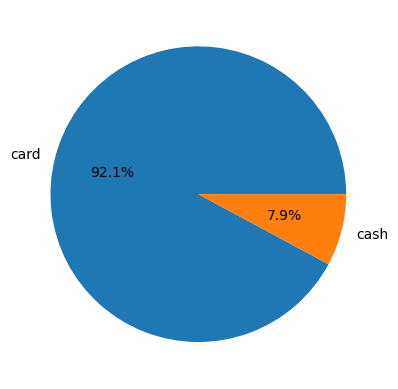

In [ ]:
plt.pie(df['cash_type'].value_counts(),labels=df['cash_type'].value_counts().index,autopct='%1.1f%%')
plt.show()

In [ ]:
#frequent uses of cash_type is 'card' 92.1%

In [ ]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

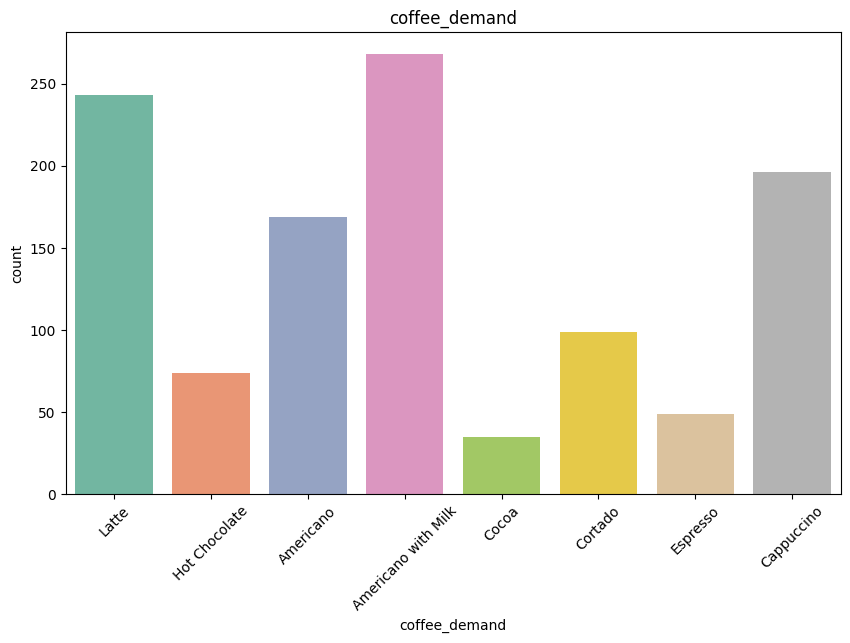

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['coffee_name'],palette='Set2')
plt.xlabel('coffee_demand')
plt.ylabel('count')
plt.xticks(rotation=45)
plt.title('coffee_demand')
plt.show()

In [ ]:
#Most ordered coffee is-1. Americano with milk  2.latte


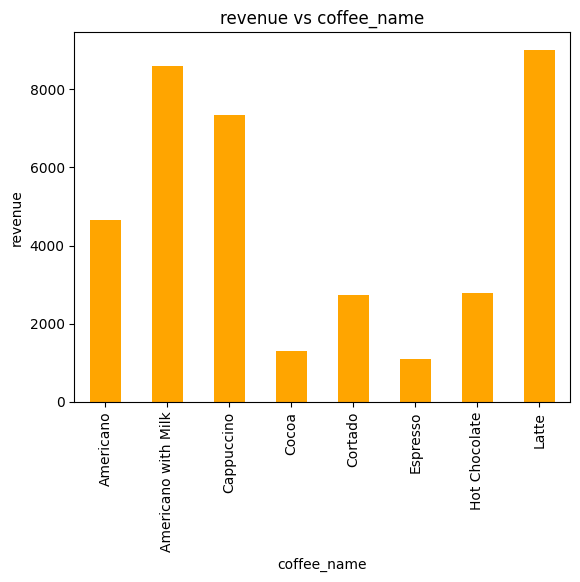

In [ ]:
df.groupby('coffee_name')['money'].sum().plot(kind='bar',color='orange')
plt.title('revenue vs coffee_name')
plt.xlabel('coffee_name')
plt.ylabel('revenue')
plt.show()

In [ ]:
money_spent_per_coffee = df.groupby('coffee_name')['money'].sum().reset_index()
display(money_spent_per_coffee)

,coffee_name,money
0,Americano,4644.54
1,Americano with Milk,8601.94
2,Cappuccino,7333.14
3,Cocoa,1295.94
4,Cortado,2745.08
5,Espresso,1100.62
6,Hot Chocolate,2778.48
7,Latte,9009.14


In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name,day,month,year,hour,minute,sec
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,1,3,2024,10,15,50
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,19,22
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,20,18
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,1,3,2024,13,46,33
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,1,3,2024,13,48,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,31,7,2024,20,53,35
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,31,7,2024,20,59,25
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,31,7,2024,21,26,26
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,31,7,2024,21,54,11


In [ ]:
df['month'].unique()

array([3, 4, 5, 6, 7])

In [ ]:
df.groupby('month')['money'].sum()

,money
month,
3,7050.20
4,6720.56
5,9063.42
6,7758.76
7,6915.94


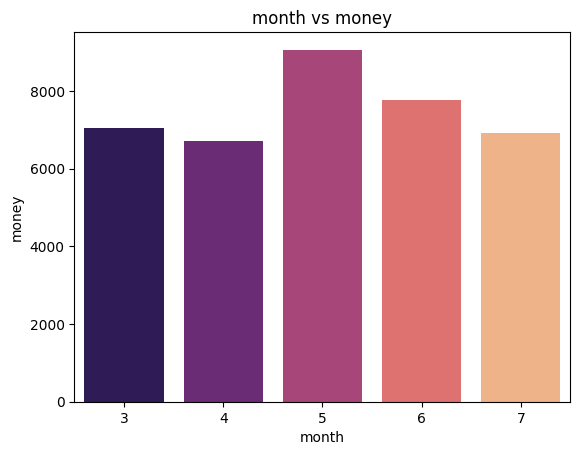

In [ ]:
sns.barplot(x=df.groupby('month')['money'].sum().index, y=df.groupby('month')['money'].sum().values, palette='magma')
plt.title('month vs money')
plt.xlabel('month')
plt.ylabel('money')
plt.show()

In [ ]:
df['year'].unique()

array([2024])

In [ ]:
montly_money=df.groupby(['year','month'])['money'].sum().reset_index()


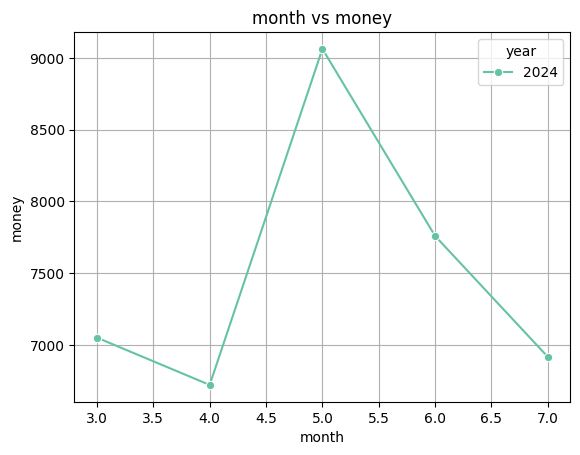

In [ ]:
sns.lineplot(data=montly_money,x='month',y='money',hue='year',marker='o',palette='Set2')
plt.title('month vs money')
plt.xlabel('month')
plt.ylabel('money')
plt.legend(title='year')
plt.grid(True)
plt.show()

In [ ]:
#ax.bar_label(ax.containers[0], fontsize=6)

In [ ]:
[df['date'].min(),df['date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

In [ ]:
monthly_sales=df.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name,month,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,3,36,34,20,6,30,10,22,48
1,4,35,42,43,6,19,7,13,31
2,5,48,58,55,9,17,8,14,58
3,6,14,69,46,5,19,10,14,50
4,7,36,65,32,9,14,14,11,56


In [ ]:
monthly_sales.describe().T.loc[:,['min','max']]

,min,max
coffee_name,,
month,3.0,7.0
Americano,14.0,48.0
Americano with Milk,34.0,69.0
Cappuccino,20.0,55.0
Cocoa,5.0,9.0
Cortado,14.0,30.0
Espresso,7.0,14.0
Hot Chocolate,11.0,22.0
Latte,31.0,58.0


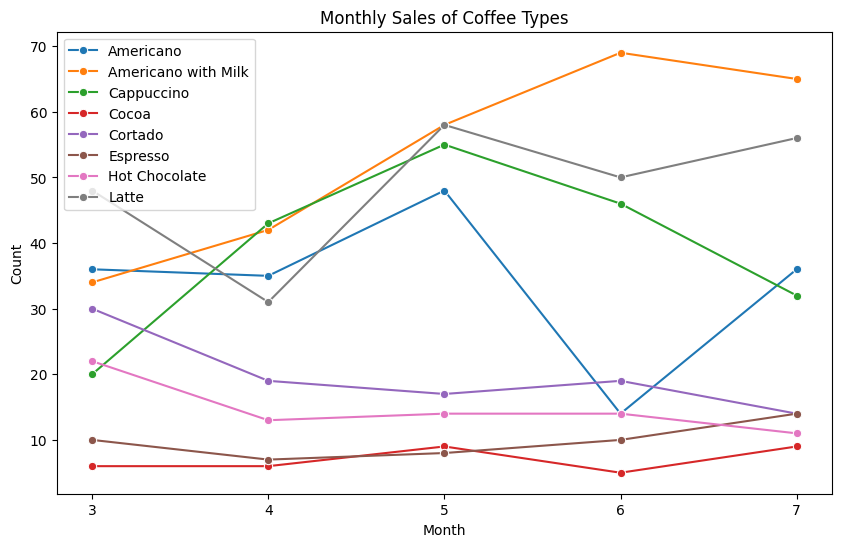

In [ ]:
plt.figure(figsize=(10,6))
for coffee_name in monthly_sales.columns[1:]:
    sns.lineplot(data=monthly_sales, x='month', y=coffee_name, marker='o', label=coffee_name)
plt.legend(loc='upper left')
plt.xticks(monthly_sales['month'], monthly_sales['month'])
plt.title('Monthly Sales of Coffee Types')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [ ]:
df['dayweek']=df['date'].dt.strftime('%w')

In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name,day,month,year,hour,minute,sec,dayweek
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,1,3,2024,10,15,50,5
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,19,22,5
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,20,18,5
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,1,3,2024,13,46,33,5
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,1,3,2024,13,48,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,31,7,2024,20,53,35,3
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,31,7,2024,20,59,25,3
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,31,7,2024,21,26,26,3
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,31,7,2024,21,54,11,3


In [ ]:
weekday_sale=df.groupby(['dayweek']).count()['date'].reset_index().rename(columns={'date':'count'})

In [ ]:
weekday_sale

,dayweek,count
0,0,151
1,1,151
2,2,185
3,3,165
4,4,164
5,5,163
6,6,154


([<matplotlib.axis.XTick at 0x7e45bebca930>,
 [Text(0, 0, 'Sun'),
  Text(1, 0, 'Mon'),
  Text(2, 0, 'Tue'),
  Text(3, 0, 'Wed'),
  Text(4, 0, 'Thur'),
  Text(5, 0, 'Fri'),
  Text(6, 0, 'Sat')])

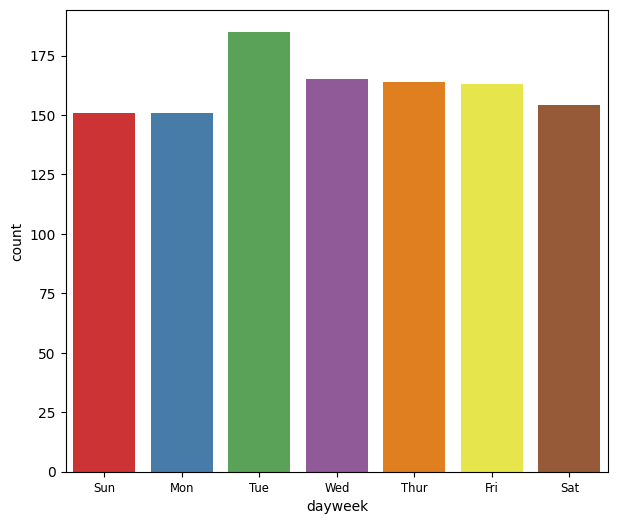

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(data=weekday_sale,x='dayweek',y='count',palette='Set1')
plt.xticks(range(len(weekday_sale['dayweek'])),['Sun','Mon','Tue',
'Wed','Thur','Fri','Sat'],size='small')

In [ ]:
# tuesday has the highest sale and other are relatively similar

In [ ]:
daily_sales =df.groupby(['coffee_name','date']).count()['datetime'].reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)


In [ ]:
daily_sales

coffee_name,date,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
0,2024-03-01,1.0,4.0,0.0,1.0,0.0,0.0,3.0,2.0
1,2024-03-02,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2024-03-03,1.0,2.0,0.0,1.0,2.0,0.0,2.0,2.0
3,2024-03-04,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
4,2024-03-05,0.0,0.0,0.0,1.0,1.0,0.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...
145,2024-07-27,0.0,5.0,4.0,0.0,0.0,2.0,0.0,2.0
146,2024-07-28,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
147,2024-07-29,3.0,2.0,2.0,1.0,0.0,0.0,2.0,1.0
148,2024-07-30,2.0,12.0,2.0,0.0,3.0,2.0,0.0,3.0


In [ ]:
hour_sales=df.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})

In [ ]:
hour_sales

,hour,count
0,7,13
1,8,44
2,9,50
3,10,133
4,11,103
5,12,87
6,13,78
7,14,76
8,15,65
9,16,77


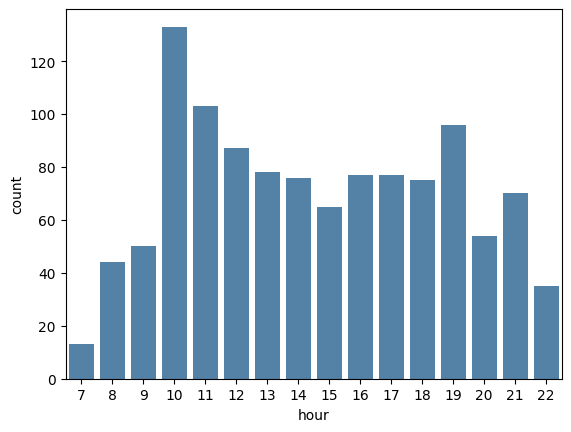

In [ ]:
sns.barplot(data=hour_sales,x='hour',y='count',color='steelblue')
plt.show()

In [ ]:
#Two peak hour can be observed at 10:00 AM and 7:00 PM

In [ ]:
df

,date,datetime,cash_type,card,money,coffee_name,day,month,year,hour,minute,sec,dayweek
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,1,3,2024,10,15,50,5
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,19,22,5
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,1,3,2024,12,20,18,5
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,1,3,2024,13,46,33,5
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,1,3,2024,13,48,14,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,31,7,2024,20,53,35,3
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,31,7,2024,20,59,25,3
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,31,7,2024,21,26,26,3
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,31,7,2024,21,54,11,3


In [ ]:
cat_features=[feature for feature in df.columns if df [feature].dtype=='O']

In [ ]:
cat_features

['cash_type', 'card', 'coffee_name', 'dayweek']

In [ ]:
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
num_feature

['date', 'datetime', 'money', 'day', 'month', 'year', 'hour', 'minute', 'sec']

In [ ]:
df=pd.get_dummies(df,columns=cat_features,drop_first=True,dtype='int')

In [ ]:
df

,date,datetime,money,day,month,year,hour,minute,sec,cash_type_cash,...,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,dayweek_1,dayweek_2,dayweek_3,dayweek_4,dayweek_5,dayweek_6
0,2024-03-01,2024-03-01 10:15:50.520,38.70,1,3,2024,10,15,50,0,...,0,0,0,1,0,0,0,0,1,0
1,2024-03-01,2024-03-01 12:19:22.539,38.70,1,3,2024,12,19,22,0,...,0,0,1,0,0,0,0,0,1,0
2,2024-03-01,2024-03-01 12:20:18.089,38.70,1,3,2024,12,20,18,0,...,0,0,1,0,0,0,0,0,1,0
3,2024-03-01,2024-03-01 13:46:33.006,28.90,1,3,2024,13,46,33,0,...,0,0,0,0,0,0,0,0,1,0
4,2024-03-01,2024-03-01 13:48:14.626,38.70,1,3,2024,13,48,14,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,23.02,31,7,2024,20,53,35,0,...,1,0,0,0,0,0,1,0,0,0
1129,2024-07-31,2024-07-31 20:59:25.013,27.92,31,7,2024,20,59,25,0,...,0,0,0,0,0,0,1,0,0,0
1130,2024-07-31,2024-07-31 21:26:26.000,32.82,31,7,2024,21,26,26,0,...,0,0,0,1,0,0,1,0,0,0
1131,2024-07-31,2024-07-31 21:54:11.824,32.82,31,7,2024,21,54,11,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X=df.drop(columns=['money','date','datetime'])

In [ ]:
y=df['money']

In [ ]:
X

,day,month,year,hour,minute,sec,cash_type_cash,card_ANON-0000-0000-0002,card_ANON-0000-0000-0003,card_ANON-0000-0000-0004,...,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,dayweek_1,dayweek_2,dayweek_3,dayweek_4,dayweek_5,dayweek_6
0,1,3,2024,10,15,50,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,3,2024,12,19,22,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,3,2024,12,20,18,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,3,2024,13,46,33,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,3,2024,13,48,14,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,31,7,2024,20,53,35,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1129,31,7,2024,20,59,25,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1130,31,7,2024,21,26,26,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1131,31,7,2024,21,54,11,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
y

,money
0,38.70
1,38.70
2,38.70
3,28.90
4,38.70
...,...
1128,23.02
1129,27.92
1130,32.82
1131,32.82


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,day,month,year,hour,minute,sec,cash_type_cash,card_ANON-0000-0000-0002,card_ANON-0000-0000-0003,card_ANON-0000-0000-0004,...,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,dayweek_1,dayweek_2,dayweek_3,dayweek_4,dayweek_5,dayweek_6
1117,31,7,2024,13,11,42,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
587,24,5,2024,22,30,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
613,27,5,2024,14,6,43,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
923,5,7,2024,22,18,56,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1062,27,7,2024,12,25,10,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,5,6,2024,20,12,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
905,3,7,2024,13,51,14,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1096,30,7,2024,11,14,41,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
235,5,4,2024,16,17,43,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
y_train

,money
1117,32.82
587,32.82
613,37.72
923,27.92
1062,27.92
...,...
715,27.92
905,32.82
1096,27.92
235,40.00


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
X_train,y_train

(      day  month  year  hour  minute  sec  cash_type_cash  \
 1117   31      7  2024    13      11   42               0   
 587    24      5  2024    22      30   40               0   
 613    27      5  2024    14       6   43               0   
 923     5      7  2024    22      18   56               0   
 1062   27      7  2024    12      25   10               0   
 ...   ...    ...   ...   ...     ...  ...             ...   
 715     5      6  2024    20      12    1               0   
 905     3      7  2024    13      51   14               0   
 1096   30      7  2024    11      14   41               0   
 235     5      4  2024    16      17   43               1   
 1061   27      7  2024    11      55   31               0   
 
       card_ANON-0000-0000-0002  card_ANON-0000-0000-0003  \
 1117                         0                         0   
 587                          0                         0   
 613                          0                         0   
 923      

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.81110442e-02, -1.04872208e+00, -3.84803300e-13,  1.22308306e-03,
        9.99294681e-03, -2.27132588e-03,  1.12029214e+00, -1.22075299e+00,
        6.92088816e-02, -7.83058883e-01, -1.73986523e+00, -3.55271368e-15,
       -1.84347282e+00, -1.65755284e+00, -2.25530301e-01, -8.48346383e-01,
       -1.47970440e+00,  7.06349579e-02, -9.47257414e-01, -1.48568365e+00,
       -1.55903064e+00, -1.29525382e+00, -3.24929457e-01, -1.73026132e+00,
       -3.91626879e-01, -1.61757671e+00, -1.43172382e+00, -5.89537349e-01,
       -9.90634310e-01, -2.88940034e-01,  3.19762675e-01, -7.07497111e-01,
       -1.03726669e+00, -8.52107019e-01, -1.17124083e+00, -5.77315973e-15,
       -8.01895315e-01, -5.10423423e-01, -5.27483211e-01, -1.02638703e+00,
       -1.19176424e+00, -1.34804998e+00, -1.42936167e+00, -2.38228014e-01,
       -1.99840144e-15,  2.66974414e-02, -6.40482306e-01, -2.85582860e-02,
       -9.55167605e-01, -6.61034311e-01, -8.32031489e-01, -1.41409558e+00,
       -7.99680555e-01, -

In [ ]:
len(model.coef_)

465

In [ ]:
model.intercept_

np.float64(33.25687998405761)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

array([32.42033854, 32.82      , 37.84161833, 27.85980986, 28.80633569,
       33.58211786, 32.65300242, 28.9847408 , 38.7       , 32.31285704,
       37.72      , 38.7       , 33.83173545, 32.65900577, 27.25131305,
       27.92315958, 29.65628951, 37.7691131 , 38.22842708, 28.41078846,
       37.27740131, 28.9       , 29.41602003, 33.47518061, 37.75111565,
       37.4690174 , 28.83682569, 23.94613747, 32.82      , 27.05937223,
       37.72      , 37.72      , 32.68569799, 37.72      , 38.18437546,
       34.91178492, 28.20428851, 38.7       , 33.8       , 27.92      ,
       28.47100928, 37.44507085, 32.87699795, 26.92659634, 32.82      ,
       28.74337231, 38.48682679, 37.67905372, 30.2873887 , 38.48783279,
       22.73084208, 31.34895693, 28.03226177, 28.7006848 , 39.10592586,
       37.72      , 36.76286957, 38.70953913, 24.77302757, 38.71569043,
       38.37109132, 23.02      , 37.72      , 38.66027439, 32.82      ,
       37.72      , 39.16706449, 40.49229943, 22.84931126, 27.85

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred_test)

1.4124349455257268

In [ ]:
r2_score(y_test,y_pred_test)

0.9420892729728719